In [1]:
import data_loader
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit

In [2]:
df = data_loader.load_data('covid19-20200320.csv')
cases, deaths = data_loader.clean_data(df, cumsum = True)

In [20]:
from data_fit import exponentFunction, logisticFunction, gaussianFunction
import numpy as np

def compute_error( y, func, func_params, cut_zeros = True):
        
    y = y.to_numpy()
    
    # find first case
    first_case = next((i for i, x in enumerate(y) if x), None)
        
    x = np.arange(0, len(cases) )
    y_pred = func(x, *func_params)
    
    mse = np.mean((y_pred[first_case:] - y[first_case:])**2)

    return mse




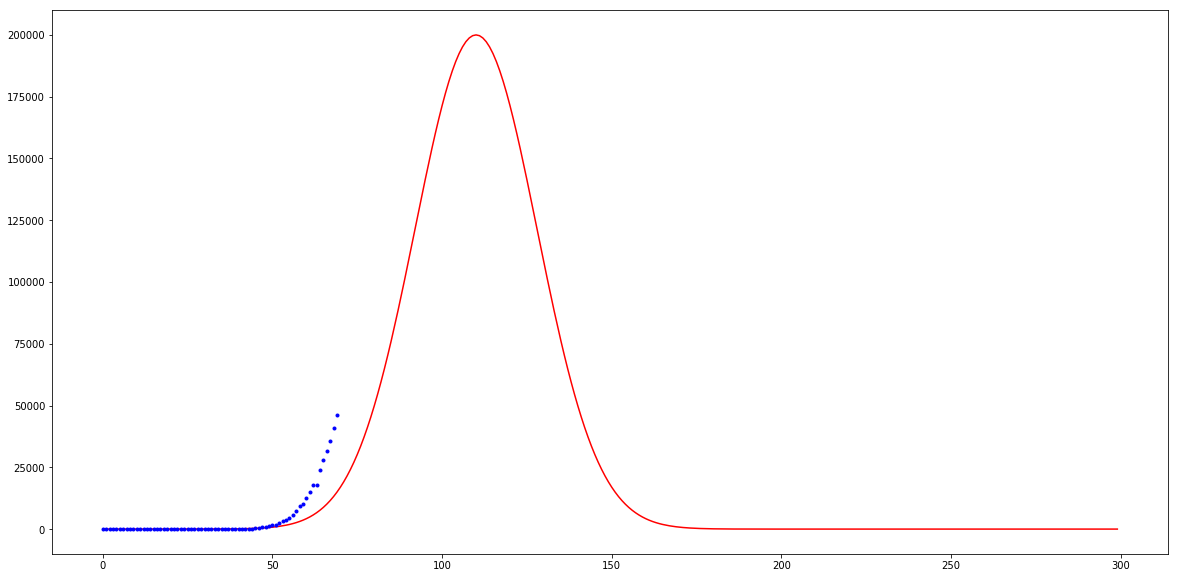

In [45]:
# Get a rough idea of parameters
amplitude = 200000
mean = 110
sigma = 18

gaussian_params = [amplitude, mean, sigma]

country = 'Italy'

x = np.arange(300)

plt.figure(figsize=(20,10))
plt.plot( x , gaussianFunction(x, *gaussian_params), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(gaussian_params))
plt.plot(range(len(cases)), cases[country], 'b.')

plt.show()


In [39]:
min = np.inf

for amplitude in range(40000, 300000, 5000):
    for mean in range(50, 150):
        for sigma in range(10, 30):
            
            gaussian_params = [amplitude, mean, sigma]
            mse = compute_error(cases['France'], gaussianFunction, gaussian_params)
            
            if mse < min:
                min = mse
                print(gaussian_params, mse)

    

[40000, 50, 10] 470551777.08302
[40000, 51, 10] 465130623.44136864
[40000, 52, 10] 459105077.8571716
[40000, 53, 10] 452408406.43779916
[40000, 54, 10] 444958248.8402523
[40000, 55, 10] 436654918.5615715
[40000, 56, 10] 427381425.7344338
[40000, 57, 10] 417005939.53014874
[40000, 58, 10] 405387282.83157426
[40000, 59, 10] 392383784.0542266
[40000, 60, 10] 377865404.29393923
[40000, 61, 10] 361728546.73028135
[40000, 62, 10] 343912404.82547987
[40000, 63, 10] 324415206.65843904
[40000, 64, 10] 303308366.26262015
[40000, 65, 10] 280746452.2215034
[40000, 66, 10] 256971091.91100782
[40000, 67, 10] 232307460.43290296
[40000, 68, 10] 207152810.42052576
[40000, 69, 10] 181957478.17431584
[40000, 70, 10] 157199805.29505676
[40000, 71, 10] 133357278.31862019
[40000, 72, 10] 110876762.1438885
[40000, 73, 10] 90146882.64747569
[40000, 74, 10] 71475364.33342476
[40000, 75, 10] 55073490.78021962
[40000, 76, 10] 41048937.33488874
[40000, 77, 10] 29407180.42588732
[40000, 78, 10] 20060683.408728458


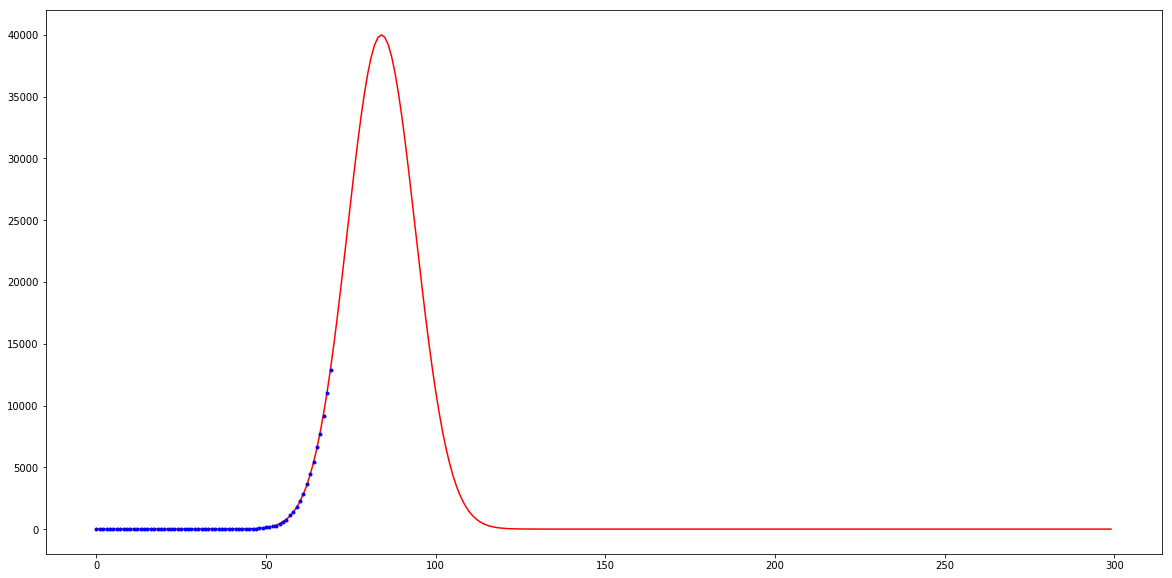

In [42]:
gaussian_params = [40000, 84, 10]

x = np.arange(300)

plt.figure(figsize=(20,10))
plt.plot( x , gaussianFunction(x, *gaussian_params), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(gaussian_params))
plt.plot(range(len(cases)), cases[country], 'b.')
plt.show()

